### Import the library

In [1]:
import pandas as pd
from fbprophet import Prophet

### Read dataset & preprocessing 

In [59]:
df = pd.read_csv('retail_sales.csv')
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [60]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [61]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [62]:
df['year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['tanggal'] = pd.DatetimeIndex(df['year']+'-'+df['month']+'-'+df['day'])

In [63]:
df.head()

,Time Date,Product,Store,Value,year,month,day,tanggal
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [64]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
year                 object
month                object
day                  object
tanggal      datetime64[ns]
dtype: object

In [65]:
df.drop(['year','month','day','Time Date'], axis=1, inplace=True)

In [66]:
df.drop(['Product','Store'], axis=1, inplace=True)
df.columns = ['y','ds']

In [67]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


<AxesSubplot:xlabel='ds'>

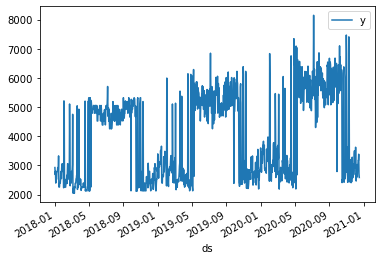

In [73]:
df.plot(x='ds', y='y')

### Train model

In [70]:
model = Prophet(interval_width=0.95, daily_seasonality=True)
model_fit = model.fit(df)
model_fit

### Forecast Away

In [74]:
future = model.make_future_dataframe(periods=100, freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.489276,918.207423,3885.963690,3041.489276,3041.489276,-641.915345,-641.915345,-641.915345,467.724032,...,16.611941,16.611941,16.611941,-1126.251318,-1126.251318,-1126.251318,0.0,0.0,0.0,2399.573931
1,2018-01-02,3042.246698,894.555335,3898.647996,3042.246698,3042.246698,-652.029690,-652.029690,-652.029690,467.724032,...,-11.285067,-11.285067,-11.285067,-1108.468655,-1108.468655,-1108.468655,0.0,0.0,0.0,2390.217008
2,2018-01-03,3043.004119,774.768834,4047.150822,3043.004119,3043.004119,-626.188801,-626.188801,-626.188801,467.724032,...,-4.407267,-4.407267,-4.407267,-1089.505566,-1089.505566,-1089.505566,0.0,0.0,0.0,2416.815318
3,2018-01-04,3043.761541,851.652943,4026.362949,3043.761541,3043.761541,-579.252371,-579.252371,-579.252371,467.724032,...,22.462032,22.462032,22.462032,-1069.438435,-1069.438435,-1069.438435,0.0,0.0,0.0,2464.509170
4,2018-01-05,3044.518962,915.292468,3976.251275,3044.518962,3044.518962,-615.260367,-615.260367,-615.260367,467.724032,...,-34.588120,-34.588120,-34.588120,-1048.396280,-1048.396280,-1048.396280,0.0,0.0,0.0,2429.258595


In [75]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4240.642325,2127.253428,5402.379398,4237.661088,4243.843829,-514.955476,-514.955476,-514.955476,467.724032,...,16.611941,16.611941,16.611941,-999.291449,-999.291449,-999.291449,0.0,0.0,0.0,3725.686849
1176,2021-03-23,4241.721263,2237.239298,5374.765676,4238.698909,4244.968533,-532.411629,-532.411629,-532.411629,467.724032,...,-11.285067,-11.285067,-11.285067,-988.850594,-988.850594,-988.850594,0.0,0.0,0.0,3709.309634
1177,2021-03-24,4242.800202,2152.520892,5198.450382,4239.732714,4246.093237,-517.870965,-517.870965,-517.870965,467.724032,...,-4.407267,-4.407267,-4.407267,-981.187730,-981.187730,-981.187730,0.0,0.0,0.0,3724.929237
1178,2021-03-25,4243.879140,2182.334555,5249.851756,4240.763279,4247.217941,-486.699803,-486.699803,-486.699803,467.724032,...,22.462032,22.462032,22.462032,-976.885867,-976.885867,-976.885867,0.0,0.0,0.0,3757.179337
1179,2021-03-26,4244.958078,1938.659718,5259.896658,4241.796946,4248.342644,-543.307143,-543.307143,-543.307143,467.724032,...,-34.588120,-34.588120,-34.588120,-976.443055,-976.443055,-976.443055,0.0,0.0,0.0,3701.650936


In [77]:
df2 = forecast[['ds','yhat']]

In [78]:
df2

,ds,yhat
0,2018-01-01,2399.573931
1,2018-01-02,2390.217008
2,2018-01-03,2416.815318
3,2018-01-04,2464.509170
4,2018-01-05,2429.258595
...,...,...
1175,2021-03-22,3725.686849
1176,2021-03-23,3709.309634
1177,2021-03-24,3724.929237
1178,2021-03-25,3757.179337


<AxesSubplot:xlabel='ds'>

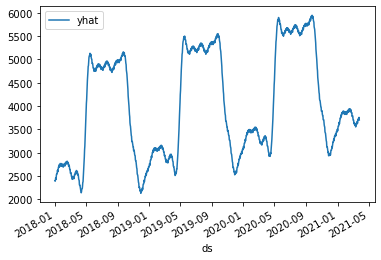

In [79]:
df2.plot(x='ds',y='yhat')

In [80]:
import matplotlib.pyplot as plt

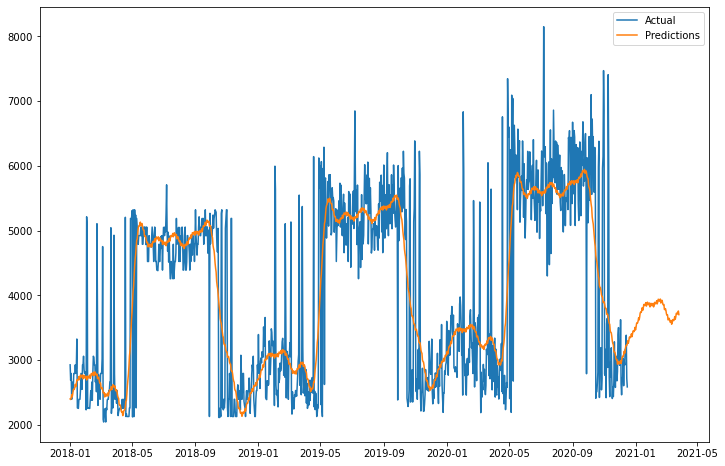

In [88]:
plt.figure(figsize=(12,8))
plt.plot(df['ds'], df['y'], label='Actual')
plt.plot(df2['ds'], df2['yhat'], label='Predictions')
plt.legend()
plt.show()

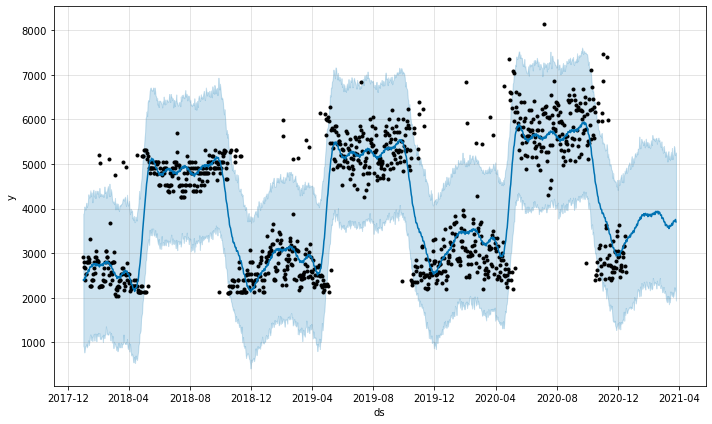

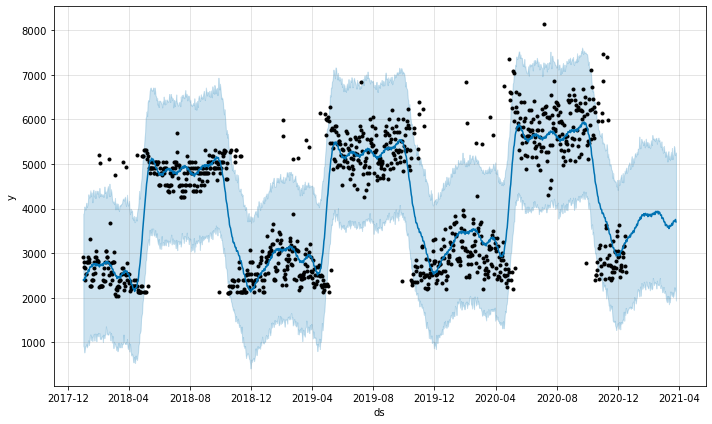

In [95]:
model.plot(forecast)

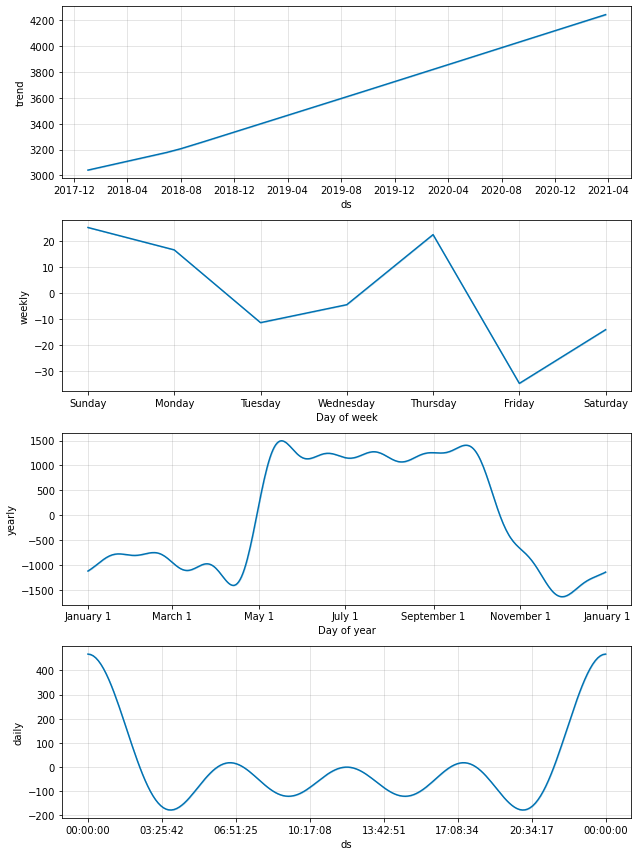

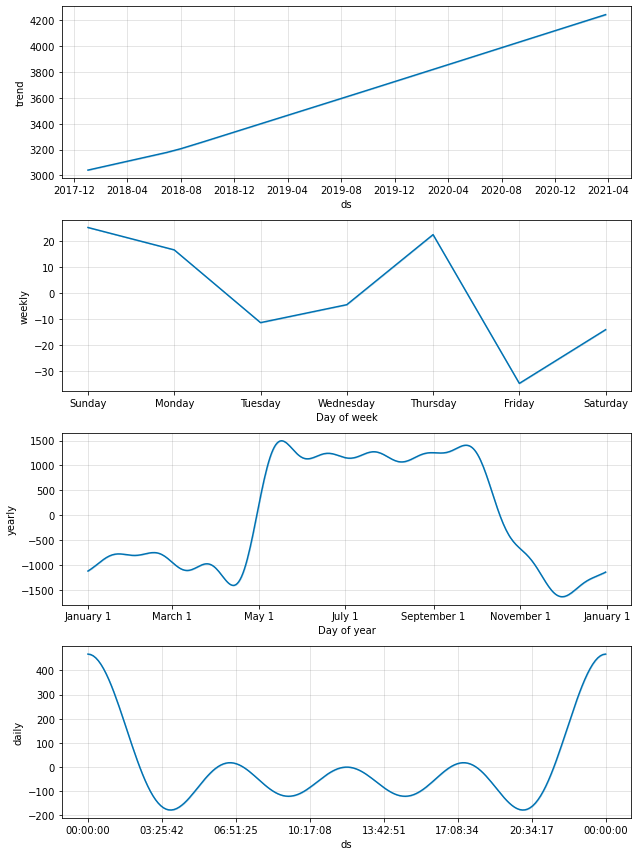

In [99]:
model.plot_components(forecast)

### Evaluate perform model using prophet cross_validation

In [101]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial='300 days', period='180 days', horizon = '250 days')
df_cv.head()

INFO:prophet:Making 3 forecasts with cutoffs between 2019-04-16 00:00:00 and 2020-04-10 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-17,2523.839212,1237.234790,3859.624635,2487.100000,2019-04-16
1,2019-04-18,2590.155437,1244.053758,3894.691386,6141.548714,2019-04-16
2,2019-04-19,2589.344187,1304.242752,3867.588095,2276.960000,2019-04-16
3,2019-04-20,2769.593095,1402.431675,4046.606730,2519.238120,2019-04-16
4,2019-04-21,2825.575314,1591.514135,4142.663316,2234.400000,2019-04-16


In [103]:
cutoffs = pd.to_datetime(['2019-04-17', '2019-08-15', '2019-04-20'])
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='250 days')

  0%|          | 0/3 [00:00<?, ?it/s]

In [104]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,25 days,2.648802e+06,1627.514145,1371.167963,0.405429,0.361454,0.554054
1,26 days,2.651713e+06,1628.407995,1385.716965,0.408022,0.357747,0.545045
2,27 days,2.641561e+06,1625.287828,1390.975135,0.405783,0.361454,0.545045
3,28 days,2.710164e+06,1646.257427,1418.849038,0.401457,0.361454,0.531532
4,29 days,2.756005e+06,1660.121984,1432.880761,0.405161,0.357747,0.531532
